In [1]:
from scripts.dataloader import create_data_loader
from scripts.vidoe2frameW import execute_v2f
import torch
from models.STM.model import CNN_LSTM, CNN


c:\Users\arwai\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DataLoader loaded


In [2]:
data_dir = 'Breakfast Action Recognition/valid'
result_dir = './data/valid'
model_path = 'models/STM/STM_Model_32.pth'
num_frames = 20

In [3]:
execute_v2f(data_dir, result_dir, num_frames)

Folder ./data/valid already exists, deleting folder
Total frames in video: 739


c:\Users\arwai\OneDrive\Documents\GitHub\Automated-Breakfast-Activity-Recognition\scripts\vidoe2frameW.py:42: AVDeprecationWarning: Using `frame.index` is deprecated.
  if frame.index in mapping:
c:\Users\arwai\OneDrive\Documents\GitHub\Automated-Breakfast-Activity-Recognition\scripts\vidoe2frameW.py:59: AVDeprecationWarning: Using `frame.index` is deprecated.
  img_pil.save(os.path.join(sv_dir, video_name.split('.')[0]) + '_frame_%05d.jpg' % frame.index)


Processed the video P48_cereals.avi and wrote individual frames to folder Breakfast Action Recognition/valid\P48P48_cereals
Total frames in video: 3092
Processed the video P48_friedegg.avi and wrote individual frames to folder Breakfast Action Recognition/valid\P48P48_friedegg
Total frames in video: 1251
Processed the video P48_juice.avi and wrote individual frames to folder Breakfast Action Recognition/valid\P48P48_juice
Total frames in video: 795
Processed the video P48_milk.avi and wrote individual frames to folder Breakfast Action Recognition/valid\P48P48_milk
Total frames in video: 4038
Processed the video P48_pancake.avi and wrote individual frames to folder Breakfast Action Recognition/valid\P48P48_pancake
Total frames in video: 5446
Processed the video P48_salat.avi and wrote individual frames to folder Breakfast Action Recognition/valid\P48P48_salat
Total frames in video: 1862
Processed the video P48_sandwich.avi and wrote individual frames to folder Breakfast Action Recogniti

In [4]:
valid_data_loader = create_data_loader(result_dir, batch_size=10, shuffle=False)


In [5]:
sequence_length = 20
num_classes = 10  

cnn = CNN()
model = CNN_LSTM(cnn, num_classes, sequence_length)

In [6]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

## Predicting Results

Confusion Matrix:
[[ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]]


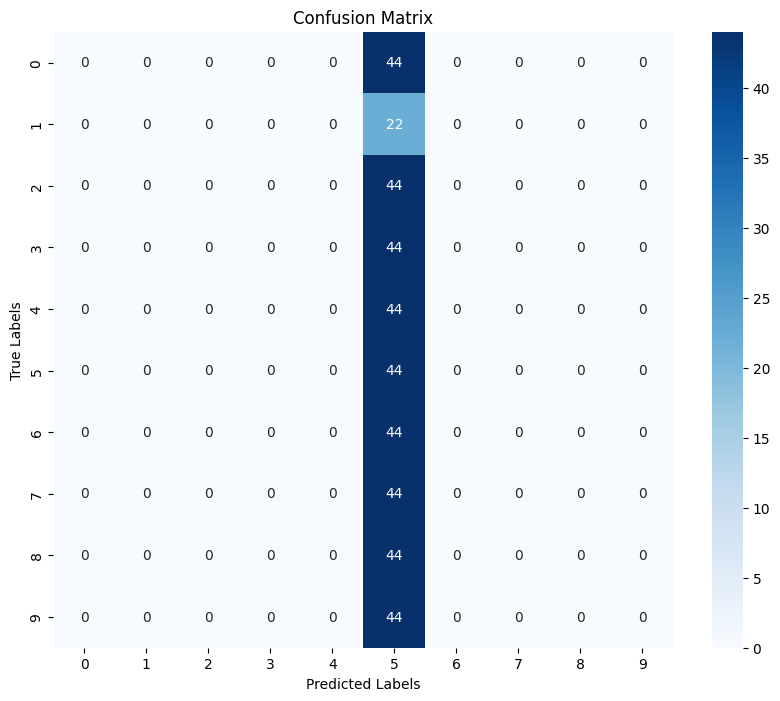

In [7]:
# import torch
# from sklearn.metrics import confusion_matrix
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the model to evaluation mode
# model.eval()

# # Initialize variables to store true and predicted labels
# all_labels = []
# all_predictions = []

# with torch.no_grad():
#     for i, (inputs, labels) in enumerate(valid_data_loader):
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
        
#         all_labels.extend(labels.cpu().numpy())
#         all_predictions.extend(predicted.cpu().numpy())

# # Convert lists to numpy arrays
# all_labels = np.array(all_labels)
# all_predictions = np.array(all_predictions)

# # Compute confusion matrix
# conf_matrix = confusion_matrix(all_labels, all_predictions)

# # Print confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

# # Plot confusion matrix using seaborn
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for i, (inputs, labels) in enumerate(valid_data_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 10 %
